# WeatherPy
----
## Overall Analysis
* Latitude and Temperature have a strong correlations throughout the study. The scatterplot gives statistical evidence that the closer to 0 degrees latitude, the higher the temperatures. There were, however, several outliers for this graph at -20 and 40 degrees.
* Both the Northern and Southern Hemishperes showed strong correlations witht the Latitude and Temperature filter with Northern having a strong negative correlation and Southern having a strong positive correlation. 
* Out of the cities randomly chosen for this study. There were little to no correlation with latitude vs. wind speed, cloudiness, or humidity. 

In [110]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [111]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=550)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=550)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

287

In [112]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [113]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. On the Road to Next City...")

print("-----------------------------")
print("Data Retrieval Complete! Hope you enjoyed your trip!")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : mataura
Processing Record 2 of Set 1 : bredasdorp
Processing Record 3 of Set 1 : provideniya
Processing Record 4 of Set 1 : dikson
Processing Record 5 of Set 1 : englewood
Processing Record 6 of Set 1 : hobart
Processing Record 7 of Set 1 : sabang
Processing Record 8 of Set 1 : ternate
Processing Record 9 of Set 1 : saint george
Processing Record 10 of Set 1 : oktyabrskoye
Processing Record 11 of Set 1 : coulommiers
Processing Record 12 of Set 1 : punta arenas
Processing Record 13 of Set 1 : rikitea
Processing Record 14 of Set 1 : cape town
Processing Record 15 of Set 1 : port alfred
Processing Record 16 of Set 1 : nanortalik
Processing Record 17 of Set 1 : thompson
Processing Record 18 of Set 1 : alofi
Processing Record 19 of Set 1 : new norfolk
City not found. On the Road to Next City...
Processing Record 20 of Set 1 : jamestown
Processing Record 21 of Set 1 : nhulunbuy
Processing Record 22 of Set 

Processing Record 31 of Set 4 : otane
Processing Record 32 of Set 4 : flinders
Processing Record 33 of Set 4 : te anau
Processing Record 34 of Set 4 : srednekolymsk
Processing Record 35 of Set 4 : gorom-gorom
Processing Record 36 of Set 4 : libohove
Processing Record 37 of Set 4 : lata
Processing Record 38 of Set 4 : mecca
Processing Record 39 of Set 4 : shelburne
Processing Record 40 of Set 4 : norman wells
Processing Record 41 of Set 4 : kavieng
Processing Record 42 of Set 4 : coihaique
Processing Record 43 of Set 4 : erzin
Processing Record 44 of Set 4 : kalmunai
Processing Record 45 of Set 4 : souillac
Processing Record 46 of Set 4 : goiania
Processing Record 47 of Set 4 : qaanaaq
Processing Record 48 of Set 4 : sinjhoro
Processing Record 49 of Set 4 : port hardy
Processing Record 50 of Set 4 : borogontsy
City not found. On the Road to Next City...
Processing Record 0 of Set 5 : belyy yar
Processing Record 1 of Set 5 : bambous virieux
Processing Record 2 of Set 5 : washington
City 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [114]:
weather_list = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [115]:
weather_list.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mataura,92,NZ,1628449212,99,-46.1927,168.8643,35.47,3.33
1,Bredasdorp,100,ZA,1628449083,58,-34.5322,20.0403,58.32,13.80
2,Provideniya,100,RU,1628448853,81,64.3833,-173.3000,45.39,15.93
3,Dikson,0,RU,1628449354,79,73.5069,80.5464,46.08,5.19
4,Englewood,0,US,1628449213,21,39.6478,-104.9878,93.40,3.00
5,Hobart,12,AU,1628448932,88,-42.8794,147.3294,42.66,1.99
6,Sabang,100,ID,1628449430,77,5.8933,95.3214,82.99,14.18
7,Ternate,100,ID,1628449133,81,0.8000,127.4000,79.12,1.43
8,Saint George,1,US,1628449348,16,37.1041,-113.5841,102.67,1.99
9,Oktyabr'skoye,7,RU,1628449431,94,43.0645,44.7417,68.14,4.47


In [116]:
weather_list.to_csv("Weather Output Data/cities_output.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 
No cities had 100% humidity

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Data points do increase the closer to 0 degrees latitude that the cities are. However, the highest temperatures are after the center of the arch at 0 and located at 40 degrees latitude


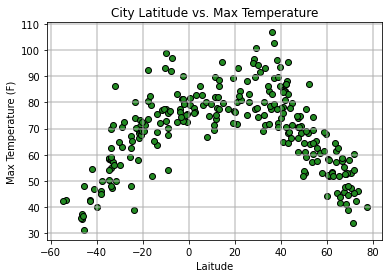

In [131]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_list["Lat"], weather_list["Max Temp"], facecolor = "forestgreen", edgecolor = "black")

# Set title and labels
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature (F)")

# Format grid lines
plt.grid(linestyle='-', linewidth=2, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Results Images/City Latitude vs Max Temperature.png")

#Analysis 
print("Analysis: Data points do increase the closer to 0 degrees latitude that the cities are. However, the highest temperatures are after the center of the arch at 0 and located at 40 degrees latitude")

## Latitude vs. Humidity Plot

The lowest humidity percentages are located at 40 and -20 degrees latitude but then increases at -40 and 60.


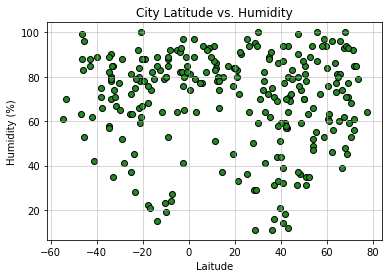

In [132]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_list["Lat"], weather_list["Humidity"], facecolor = "forestgreen", edgecolor = "black")

# Set title and labels
plt.title("City Latitude vs. Humidity")
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")

# Format grid lines
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Results Images/City Latitude vs Humidity.png")

#Analysis
print("Analysis: The lowest humidity percentages are located at 40 and -20 degrees latitude but then increases at -40 and 60.")

## Latitude vs. Cloudiness Plot

There does not seem to be any correlation between cloudiness and latitude


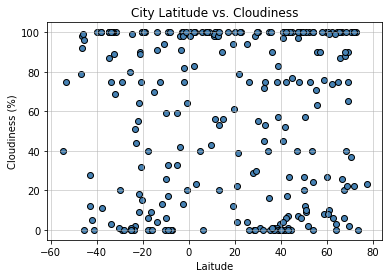

In [154]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_list["Lat"], weather_list["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title and labels
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Format grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Results Images/City Latitude vs Cloudiness.png")

#Analysis
print("Analysis: There does not seem to be any correlation between cloudiness and latitude")

## Latitude vs. Wind Speed Plot

There is no concrete correlation between wind speed and latitude with the current data set


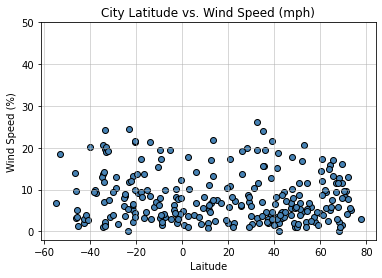

In [156]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_list["Lat"], weather_list["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Set title and labels
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Format grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Results Images/City Latitude vs Wind Speed (mph).png")

#Analysis
print("Analysis: There is no concrete correlation between wind speed and latitude with the current data set")

## Linear Regression

In [157]:
#Differentiate between Northern and Southern Hemispheres 
northern_hemisphere = weather_list.loc[weather_list["Lat"] >= 0]
southern_hemisphere = weather_list.loc[weather_list["Lat"] < 0]

In [158]:
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="green")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.71
There is a moderate to strong negative correlation between Max Temperatures and Latitude in the Northern Hemisphere.


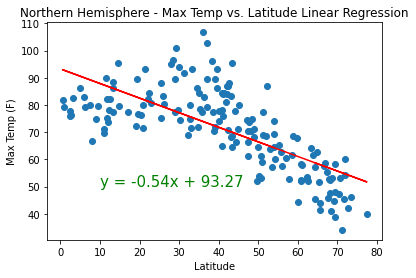

In [159]:
# Call first function 
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call function #2
annotate(equation, 10, 50)

# Set title and labels 
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Save plot to folder
plt.savefig("Results Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

#Analysis
print("Analysis: There is a moderate to strong negative correlation between Max Temperatures and Latitude in the Northern Hemisphere.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.79
There is a strong positive correlation between Max Temperature and Latitude in the Southern Hemisphere.


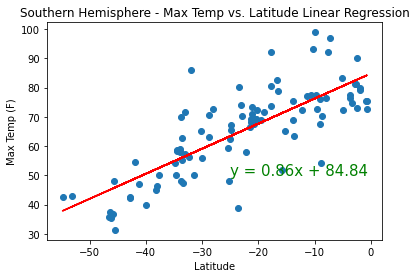

In [160]:
# Call first function 
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call second function 
annotate(equation, -25, 50)

# Set title and labels
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Save plot to folder
plt.savefig("Results Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

#Analysis
print("Analysis: There is a strong positive correlation between Max Temperature and Latitude in the Southern Hemisphere.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.07
There is no correlation in Humidity vs Latitude in the Northern Hemisphere. 


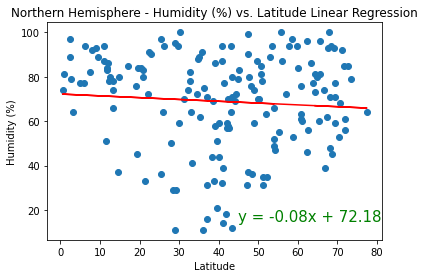

In [161]:
# Call first function 
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call second function 
annotate(equation, 45, 15)

# Set title and labels
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save plot to folder
plt.savefig("Results Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

#Analysis
print("Analysis: There is no correlation in Humidity vs Latitude in the Northern Hemisphere. ")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.03
There is no correlation in Humidity vs Latitude in the Southern Hemisphere. 


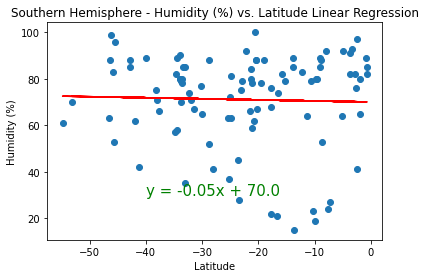

In [162]:
# Call first function 
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call second function 
annotate(equation, -40, 30)

# Set title and labels
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save plot to folder
plt.savefig("Results Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

#Analysis
print("Analysis:There is no correlation in Humidity vs Latitude in the Southern Hemisphere. ")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.09
There is a weak negative correlation in Cloudiness vs Latitude in the Northern Hemisphere. 


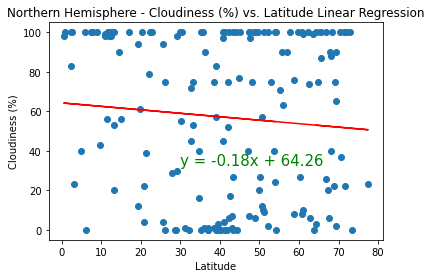

In [163]:
# Call first function 
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call second function 
annotate(equation, 30, 33)

# Set title and labels
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save plot to folder
plt.savefig("Results Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

#Analysis
print("Analysis: There is a weak negative correlation in Cloudiness vs Latitude in the Northern Hemisphere. ")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.12
There is a weak negative correlation in Cloudiness vs Latitude in the Sorthern Hemisphere. 


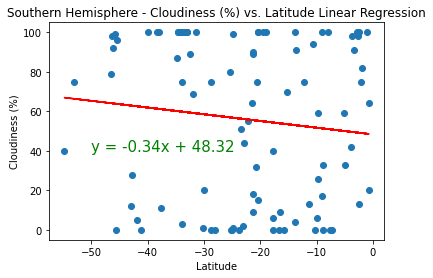

In [164]:
# Call first function 
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call second function 
annotate(equation, -50, 40)

# Set title and labels
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save plot to folder
plt.savefig("Results Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

#Analysis
print("Analysis: There is a weak negative correlation in Cloudiness vs Latitude in the Sorthern Hemisphere. ")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.0
There is no correlation in Wind Speed vs Latitude in the Northern Hemisphere. 


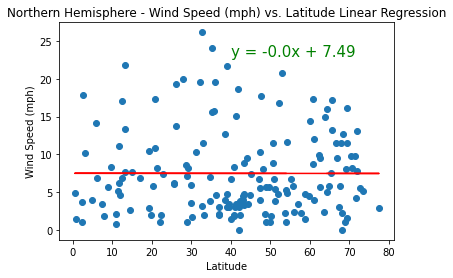

In [165]:
# Call first function 
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call second function 
annotate(equation, 40, 23)

# Set title and labels
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save plot to folder
plt.savefig("Results Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

#Analysis
print("Analysis:There is no correlation in Wind Speed vs Latitude in the Northern Hemisphere. ")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.09
There is a weak negative correlation in Wind Speed vs Latitude in the Sorthern Hemisphere. 


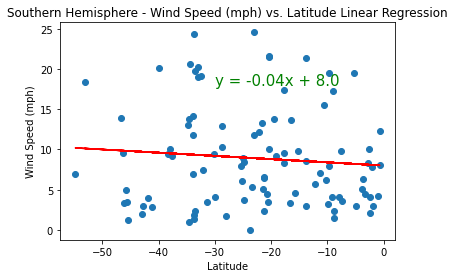

In [166]:
# Call first function 
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call second function 
annotate(equation, -30, 18)

# Set title and labels
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save plot to folder
plt.savefig("Results Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

#Analysis
print("Analysis:There is a weak negative correlation in Wind Speed vs Latitude in the Sorthern Hemisphere. ")